# Download historical data

In [357]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from datetime import datetime, date, timedelta
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.signal import argrelextrema
from dotenv import load_dotenv
import zstandard as zstd
import databento as db
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [358]:

from dateutil.relativedelta import relativedelta

# Initialize the historical client with your API key.
client = db.Historical(key="db-qLNS3JYakWiWWLtyV68KUFSUAnpE6")
# Compute dynamic date range:
now = datetime.utcnow()
# Floor the minutes to the nearest 10-minute mark.
minute_floor = (now.minute // 10) * 10
# Compute the end time by replacing minutes, seconds, microseconds and subtracting 10 minutes.
end_dt = now.replace(minute=minute_floor, second=0, microsecond=0) - timedelta(minutes=10)
# Start date: 3 months before the end time.
start_dt = end_dt - relativedelta(months=3)

# Convert datetime objects to ISO format strings.
start_date = start_dt.isoformat()
end_date = end_dt.isoformat()

print("Start Date (UTC):", start_date)
print("End Date (UTC):", end_date)

# Define your data request parameters.
dataset = "GLBX.MDP3"
symbols = ["ES.C.0"]
schema = "ohlcv-1m"
stype_in = "continuous"

# Request the data for the computed date range.
data = client.timeseries.get_range(
    dataset=dataset,
    symbols=symbols,
    start=start_date,
    end=end_date,
    schema=schema,
    stype_in=stype_in,
)

# Convert the data to a Pandas DataFrame.
df = data.to_df()


Start Date (UTC): 2024-12-06T14:20:00
End Date (UTC): 2025-03-06T14:20:00


In [359]:
df

,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol
ts_event,,,,,,,,,
2024-12-06 14:20:00+00:00,33,1,183748,6096.75,6097.25,6095.25,6096.00,737,ES.c.0
2024-12-06 14:21:00+00:00,33,1,183748,6095.75,6097.25,6095.50,6095.75,986,ES.c.0
2024-12-06 14:22:00+00:00,33,1,183748,6095.75,6095.75,6094.50,6095.00,837,ES.c.0
2024-12-06 14:23:00+00:00,33,1,183748,6095.00,6095.25,6093.75,6094.75,1425,ES.c.0
2024-12-06 14:24:00+00:00,33,1,183748,6095.00,6095.00,6094.25,6094.75,583,ES.c.0
...,...,...,...,...,...,...,...,...,...
2025-03-06 14:14:00+00:00,33,1,5002,5786.25,5787.25,5785.50,5786.25,461,ES.c.0
2025-03-06 14:15:00+00:00,33,1,5002,5785.75,5785.75,5782.00,5783.00,1143,ES.c.0
2025-03-06 14:16:00+00:00,33,1,5002,5782.75,5783.50,5780.75,5780.75,954,ES.c.0


In [360]:
import pytz
from datetime import datetime
# Input UTC time
utc_time_str = "2025-03-05 17:58:00+00:00"
utc_dt = datetime.fromisoformat(utc_time_str)
# Convert to EST
est_tz = pytz.timezone("US/Eastern")
est_dt = utc_dt.astimezone(est_tz)
print("EST time:", est_dt)

EST time: 2025-03-05 12:58:00-05:00



databento_api_key = "db-qLNS3JYakWiWWLtyV68KUFSUAnpE6"



import zstandard as zstd
import databento as db
import talib

dir_path_1h = "/Users/juju/Library/CloudStorage/GoogleDrive-jujuaria@gmail.com/My Drive/trade_data/GLBX-20250224-RSQQHMB9G7"
dir_path_1m = "/Users/juju/Library/CloudStorage/GoogleDrive-jujuaria@gmail.com/My Drive/trade_data/GLBX-20250301-7C5JWPSUX8"


filename_1h = os.path.join(dir_path_1h, "glbx-mdp3-20240824-20250223.ohlcv-1h.dbn.zst")
filename_1m = os.path.join(dir_path_1m, "glbx-mdp3-20240901-20250228.ohlcv-1m.dbn.zst")

dbn_file_1h = os.path.join(dir_path_1h, "es_futures_1h.dbn")
dbn_file_1m = os.path.join(dir_path_1h, "es_futures_1m.dbn")

filename_1m = "glbx-mdp3-20240901-20250228.ohlcv-1m.dbn.zst"
dbn_file_1m = "es_futures_1m.dbn"
# Open and decompress the .zst file
with open(filename_1m, "rb") as compressed, open(dbn_file_1m, "wb") as decompressed:
    dctx = zstd.ZstdDecompressor()
    dctx.copy_stream(compressed, decompressed)

df_1m = db.DBNStore.from_file(dbn_file_1m).to_df()




# Open and decompress the .zst file
with open(filename_1m, "rb") as compressed, open(dbn_file_1m, "wb") as decompressed:
    dctx = zstd.ZstdDecompressor()
    dctx.copy_stream(compressed, decompressed)

df_1m = db.DBNStore.from_file(dbn_file_1m).to_df()

In [361]:
df

,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol
ts_event,,,,,,,,,
2024-12-06 14:20:00+00:00,33,1,183748,6096.75,6097.25,6095.25,6096.00,737,ES.c.0
2024-12-06 14:21:00+00:00,33,1,183748,6095.75,6097.25,6095.50,6095.75,986,ES.c.0
2024-12-06 14:22:00+00:00,33,1,183748,6095.75,6095.75,6094.50,6095.00,837,ES.c.0
2024-12-06 14:23:00+00:00,33,1,183748,6095.00,6095.25,6093.75,6094.75,1425,ES.c.0
2024-12-06 14:24:00+00:00,33,1,183748,6095.00,6095.00,6094.25,6094.75,583,ES.c.0
...,...,...,...,...,...,...,...,...,...
2025-03-06 14:14:00+00:00,33,1,5002,5786.25,5787.25,5785.50,5786.25,461,ES.c.0
2025-03-06 14:15:00+00:00,33,1,5002,5785.75,5785.75,5782.00,5783.00,1143,ES.c.0
2025-03-06 14:16:00+00:00,33,1,5002,5782.75,5783.50,5780.75,5780.75,954,ES.c.0


In [362]:
df_1m = df

df = df_1m.reset_index()

# Define contract periods
# Define contract periods (converted to UTC timestamps)
contract_periods = {
    "ESU4": (pd.Timestamp("2024-08-25", tz="UTC"), pd.Timestamp("2024-09-15", tz="UTC")),  # Sep contract
    "ESZ4": (pd.Timestamp("2024-09-16", tz="UTC"), pd.Timestamp("2025-12-15", tz="UTC")),  # Dec contract
    "ESH5": (pd.Timestamp("2024-12-16", tz="UTC"), pd.Timestamp("2025-03-15", tz="UTC")),  # Mar contract
    
}


# Filter out non-tradingview symbols (like ESU4-ESZ4 spreads)
valid_symbols = list(contract_periods.keys())  # ['ESU4', 'ESZ4']
df = df[df["symbol"].isin(valid_symbols)]

# Apply date filters per contract
filtered_df = pd.concat([
    df[(df["symbol"] == symbol) & 
       (df["ts_event"]>= pd.to_datetime(start)) & 
       (df["ts_event"]<= pd.to_datetime(end))]
    for symbol, (start, end) in contract_periods.items()
])


In [363]:
filtered_df

,ts_event,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol


df_1m = filtered_df
df_1m.set_index("ts_event", inplace=True)
df_1m = df_1m.sort_index()


df_1m = pd.concat([df_1m,df],axis=0)

In [364]:
# Resample 1-minute data into 15-minute OHLCV format
df_15m = df_1m.resample("15T").agg({
    "open": "first",
    "high": "max",
    "low": "min",
    "close": "last",
    "volume": "sum"
})

# Drop NaNs caused by resampling
df_15m.dropna(inplace=True)



In [365]:
# Create a column for the previous 15-minute close
df_15m["prev_close"] = df_15m["close"].shift(1)

# Create the target variable: 1 if next close > previous close, 0 otherwise
df_15m["Target"] = (df_15m["close"] > df_15m["prev_close"]).astype(int)

# Drop NaNs created by shifting
df_15m.dropna(inplace=True)

In [366]:
df_15m

,open,high,low,close,volume,prev_close,Target
ts_event,,,,,,,
2024-12-06 14:30:00+00:00,6094.50,6103.00,6093.50,6101.75,60664,6094.25,1
2024-12-06 14:45:00+00:00,6102.00,6111.00,6101.25,6110.25,57925,6101.75,1
2024-12-06 15:00:00+00:00,6109.75,6111.00,6104.00,6106.25,47572,6110.25,0
2024-12-06 15:15:00+00:00,6106.25,6110.00,6105.25,6109.00,34249,6106.25,1
2024-12-06 15:30:00+00:00,6108.75,6110.00,6106.00,6106.00,29060,6109.00,0
...,...,...,...,...,...,...,...
2025-03-06 13:15:00+00:00,5778.25,5780.75,5769.25,5773.75,12770,5778.00,0
2025-03-06 13:30:00+00:00,5774.50,5790.75,5772.00,5783.25,21743,5773.75,1
2025-03-06 13:45:00+00:00,5783.25,5785.25,5776.50,5779.50,14035,5783.25,0


In [367]:
df_resampled = df_15m.reset_index()
# Returns & Volatility
df_resampled["returns"] = df_resampled["close"].pct_change()
df_resampled["volatility"] = df_resampled["returns"].rolling(5).std()

# ATR (Volatility)
def compute_atr(high, low, close, window=14):
    tr1 = high - low
    tr2 = abs(high - close.shift(1))
    tr3 = abs(low - close.shift(1))
    tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
    return tr.rolling(window=window).mean()

df_resampled["atr"] = compute_atr(df_resampled["high"], df_resampled["low"], df_resampled["close"])

# Relative Volume (Volume Spike Detection)
df_resampled["avg_vol"] = df_resampled["volume"].rolling(20).mean()
df_resampled["rel_vol"] = df_resampled["volume"] / df_resampled["avg_vol"]

# Momentum Indicators (Past Trend)
df_resampled["sma_5"] = df_resampled["close"].rolling(5).mean()
df_resampled["sma_15"] = df_resampled["close"].rolling(15).mean()
df_resampled["ema_20"] = df_resampled["close"].ewm(span=20).mean()

# RSI (Past Data)
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0).rolling(window=window).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df_resampled["rsi"] = compute_rsi(df_resampled["close"])

# Candlestick Patterns (Past Behavior)
df_resampled["bullish_engulfing"] = (
    (df_resampled["close"] > df_resampled["open"]) & 
    (df_resampled["close"].shift(1) < df_resampled["open"].shift(1))
)

df_resampled["bearish_engulfing"] = (
    (df_resampled["close"] < df_resampled["open"]) & 
    (df_resampled["close"].shift(1) > df_resampled["open"].shift(1))
)

# === Use Past Data as Features ===
lags = [1, 2, 3, 5, 10, 15]
for lag in lags:
    df_resampled[f"close_lag_{lag}"] = df_resampled["close"].shift(lag)
    df_resampled[f"volume_lag_{lag}"] = df_resampled["volume"].shift(lag)
    df_resampled[f"atr_lag_{lag}"] = df_resampled["atr"].shift(lag)
    df_resampled[f"rsi_lag_{lag}"] = df_resampled["rsi"].shift(lag)

# Drop NaN values due to shifting & rolling calculations
df_resampled.dropna(inplace=True)



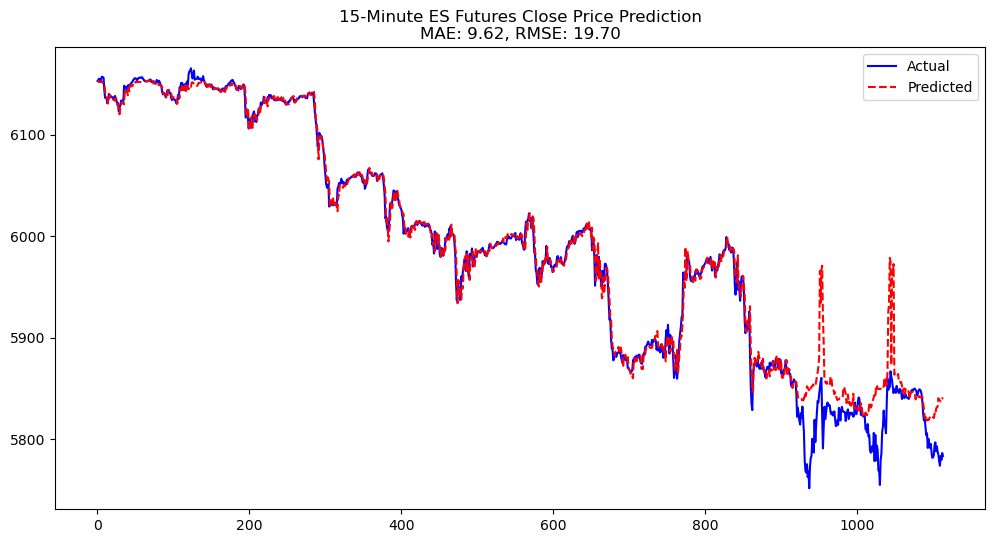

Mean Absolute Error (MAE): 9.62
Root Mean Squared Error (RMSE): 19.70


In [368]:

# Define target and features
lag_features =df_resampled.filter(like="_lag").columns
X = df_resampled[lag_features]
y = df_resampled["close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=200, learning_rate=0.05)
xgb_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test_scaled)


# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", color="blue")
plt.plot(y_pred, label="Predicted", color="red", linestyle="dashed")
plt.legend()
plt.title(f"15-Minute ES Futures Close Price Prediction\nMAE: {mae:.2f}, RMSE: {rmse:.2f}")
plt.show()

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

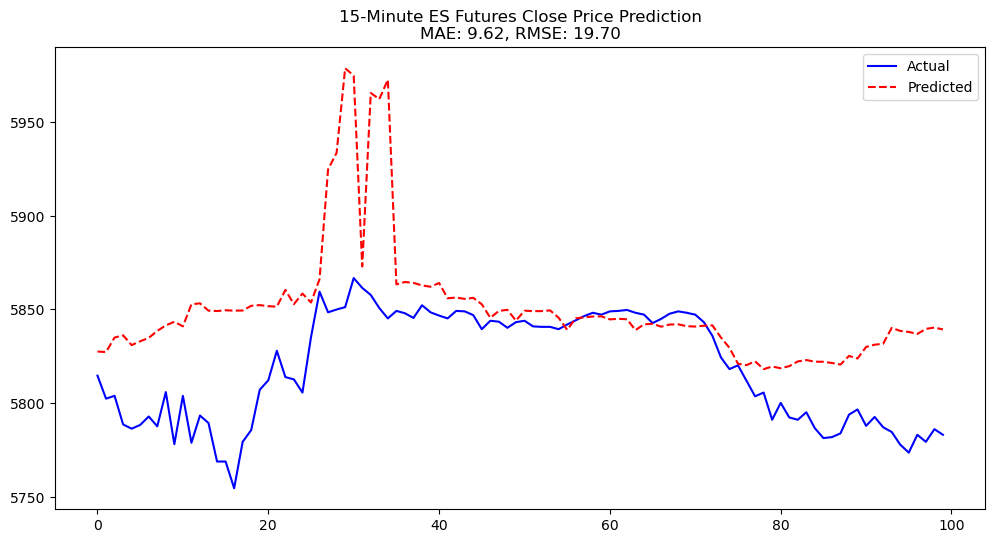

In [369]:
plt.figure(figsize=(12, 6))
plt.plot(y_test[-100:].values, label="Actual", color="blue")
plt.plot(y_pred[-100:], label="Predicted", color="red", linestyle="dashed")
plt.legend()
plt.title(f"15-Minute ES Futures Close Price Prediction\nMAE: {mae:.2f}, RMSE: {rmse:.2f}")
plt.show()

In [370]:
y_pred

array([6152.5522, 6152.7886, 6151.6084, ..., 5839.664 , 5840.3765,
       5839.378 ], dtype=float32)

In [371]:
# === Fix Support & Resistance Mapping ===
def find_support_resistance(prices, lookback):
    """Finds past support & resistance levels and maps them back to the full dataset."""
    high_idx = argrelextrema(prices.values, np.greater, order=lookback)[0]
    low_idx = argrelextrema(prices.values, np.less, order=lookback)[0]

    support_levels = pd.Series(index=prices.index, dtype=float)
    resistance_levels = pd.Series(index=prices.index, dtype=float)

    support_levels.iloc[low_idx] = prices.iloc[low_idx]
    resistance_levels.iloc[high_idx] = prices.iloc[high_idx]

    # Forward-fill so every row has a level
    support_levels.fillna(method='ffill', inplace=True)
    resistance_levels.fillna(method='ffill', inplace=True)

    return support_levels, resistance_levels


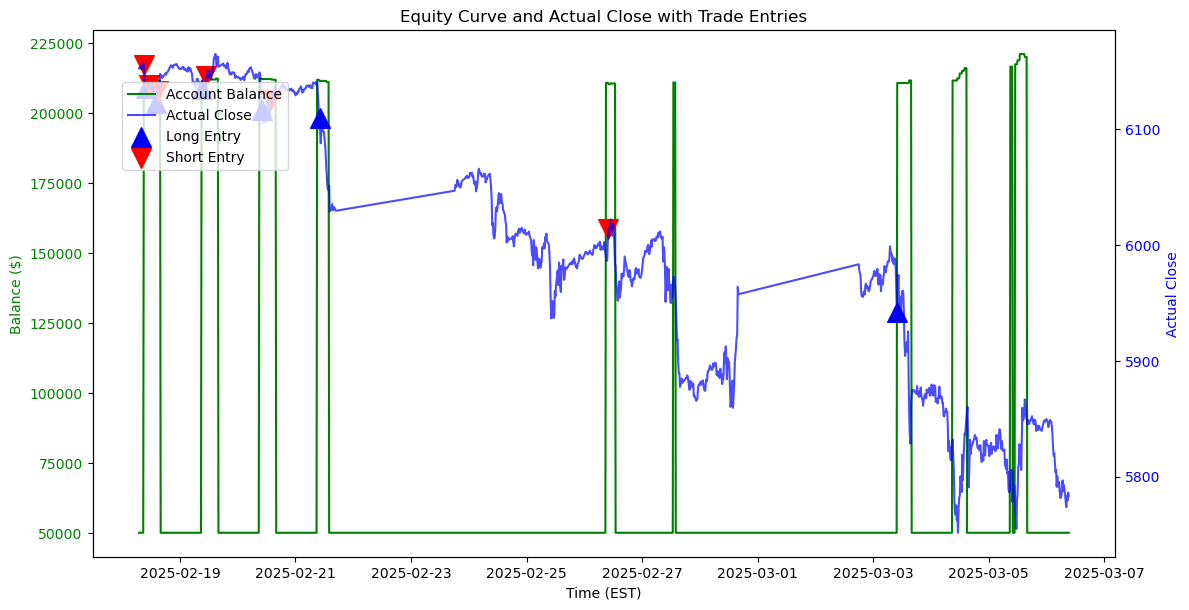

Trade Count: 49
Wins: 27 Losses: 27
Final Balance: 169968.3035714283


In [372]:
from datetime import time
import time as ttime


# === Define Trading Constraints ===
initial_balance = 0
max_daily_drawdown = 1200
trailing_drawdown = 2000
drawdown_threshold = 53000
hard_floor_above_53k = 50500
highest_balance = initial_balance
contract_size = 50  # ES futures contract size

# === Define Confidence Thresholds ===
long_threshold = 0.7  # If confidence of increase > 70%, go long
short_threshold = 0.7  # If confidence of decrease > 70%, go short


# Also compute the EST timestamp for resampled bars
df_resampled["ts_event_est"] = df_resampled["ts_event"].dt.tz_convert("US/Eastern")

# We'll use the test portion of our resampled data to simulate real-time feed.
backtest_df = df_resampled.iloc[len(y_train):].copy()
backtest_df["predicted_close"] = np.nan  # Will be filled during simulation
backtest_df["position"] = 0
backtest_df["pnl"] = 0
backtest_df["balance"] = initial_balance


equity_curve = [initial_balance]
trade_count = 0
win_count = 0
loss_count = 0

# Define allowed trading window in EST (9:30 AM to 4:00 PM)
allowed_start = time(9, 30)
allowed_end = time(16, 0)

# We'll simulate predictions every hour (i.e. every 4 intervals since 15min * 4 = 1 hour)
step = 4

for i in range(step, len(backtest_df) - step, step):
    # Check if the execution time (from EST timestamp) is within allowed trading hours.
    trade_time = backtest_df.iloc[i+step]["ts_event_est"].time()
    if not (allowed_start <= trade_time <= allowed_end):
        continue  # Skip trades outside allowed window
    else:
        backtest_df.iloc[i+step]["balance"] = backtest_df.iloc[i]["balance"]

    # Use the last hour's data (4 intervals) to form live features.
    X_live = backtest_df.iloc[i-step:i][lag_features]
    X_live_scaled = scaler.transform(X_live)
    # Predict the next hour's prices; here we use the average prediction as our signal.
    future_predictions = xgb_model.predict(X_live_scaled)
    predicted_future_price = np.mean(future_predictions)
    # Record prediction for these intervals.
    backtest_df.loc[backtest_df.index[i:i+step], "predicted_close"] = predicted_future_price

    # Compute a confidence metric: normalized difference between predicted and current price.
    current_price = backtest_df.iloc[i]["close"]
    atr = backtest_df.iloc[i]["atr"]
    confidence = abs(predicted_future_price - current_price) / atr

    # Determine trend direction: +1 for bullish, -1 for bearish.
    trend_direction = 1 if predicted_future_price > current_price else -1

    # Define dynamic stop-loss and take-profit based on ATR.
    stop_loss = 1.5 * atr
    take_profit = 2.5 * atr
    entry_price = current_price  # Use current price as entry reference.

    # Decide trade based on prediction, trend, and confidence.
    if trend_direction == 1 and confidence > long_threshold:
        position = 1  # Long trade
        stop_price = entry_price - stop_loss
        target_price = entry_price + take_profit
    elif trend_direction == -1 and confidence > short_threshold:
        position = -1  # Short trade
        stop_price = entry_price + stop_loss
        target_price = entry_price - take_profit
    else:
        position = 0  # No trade

    # Simulate trade execution at the end of the hour (i+step bar).
    actual_future_price = backtest_df.iloc[i+step]["close"]
    pnl = 0
    # For long trades:
    if position == 1:
        if actual_future_price >= target_price:
            pnl = (target_price - entry_price) * contract_size
            win_count += 1
        elif actual_future_price <= stop_price:
            pnl = (stop_price - entry_price) * contract_size
            loss_count += 1
        else:
            # Force-close at the end of the hour
            pnl = (actual_future_price - entry_price) * contract_size
            if pnl>0:
                win_count += 1
            else:
                loss_count += 1
    # For short trades:
    elif position == -1:
        if actual_future_price <= target_price:
            pnl = (entry_price - target_price) * contract_size
            win_count += 1
        elif actual_future_price >= stop_price:
            pnl = (entry_price - stop_price) * contract_size
            loss_count += 1
        else:
            # Force-close at the end of the hour
            pnl = (entry_price - actual_future_price) * contract_size
            if pnl>0:
                win_count += 1
            else:
                loss_count += 1

    # Apply risk management: update daily loss and check daily limit.
    daily_loss = max(0, -pnl)  # Each trade is independent.
    if daily_loss > max_daily_drawdown:
        continue  # Skip trade if loss exceeds daily limit.

    # Update account balance and trailing drawdown.
    current_balance += pnl
    if current_balance > highest_balance:
        highest_balance = current_balance
    min_balance = max(47500, highest_balance - trailing_drawdown)
    if highest_balance >= drawdown_threshold:
        min_balance = max(hard_floor_above_53k, min_balance)
    if current_balance < min_balance:
        continue  # Skip trade if balance falls below allowed threshold.

    # Record trade details for these intervals.
    backtest_df.loc[backtest_df.index[i:i+step], "position"] = position
    backtest_df.loc[backtest_df.index[i:i+step], "pnl"] = pnl
    backtest_df.loc[backtest_df.index[i:i+step], "balance"] = current_balance
    equity_curve.append(current_balance)
    trade_count += 1

# Forward-fill the balance so every timestamp shows the latest balance.

backtest_df["balance"] = 50000+backtest_df["balance"]


# Create the figure and primary axis for the equity curve
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the equity curve (account balance) on the primary y-axis (left)
color1 = 'green'
ax1.plot(backtest_df["ts_event_est"], backtest_df["balance"],
         label="Account Balance", color=color1)
ax1.set_xlabel("Time (EST)")
ax1.set_ylabel("Balance ($)", color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Create a secondary y-axis for the actual close price
ax2 = ax1.twinx()
color2 = 'blue'
ax2.plot(backtest_df["ts_event_est"], backtest_df["close"],
         label="Actual Close", color=color2, alpha=0.7)
ax2.set_ylabel("Actual Close", color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Extract trade entry rows: when position is non-zero and changes from the previous row.
trade_entries = backtest_df[backtest_df["position"] != 0].copy()
trade_entries = trade_entries[trade_entries["position"].shift(1) != trade_entries["position"]]

# Plot long entries (position == 1) with upward triangles on the secondary axis.
long_entries = trade_entries[trade_entries["position"] == 1]
ax2.scatter(long_entries["ts_event_est"], long_entries["close"],
            marker="^", color="blue", s=200, label="Long Entry")

# Plot short entries (position == -1) with downward triangles on the secondary axis.
short_entries = trade_entries[trade_entries["position"] == -1]
ax2.scatter(short_entries["ts_event_est"], short_entries["close"],
            marker="v", color="red", s=200, label="Short Entry")

# Add legends and title
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.title("Equity Curve and Actual Close with Trade Entries")
plt.show()

# Print trade summary
print("Trade Count:", trade_count)
print("Wins:", win_count, "Losses:", loss_count)
print("Final Balance:", current_balance)


In [373]:
trade_entries

,ts_event,open,high,low,close,volume,prev_close,Target,returns,volatility,...,rsi_lag_10,close_lag_15,volume_lag_15,atr_lag_15,rsi_lag_15,ts_event_est,predicted_close,position,pnl,balance
4491,2025-02-18 14:00:00+00:00,6156.75,6157.25,6155.25,6156.00,4950,6156.50,0,-0.000081,0.000371,...,54.666667,6149.25,1601.0,3.625000,40.404040,2025-02-18 09:00:00-05:00,6151.766113,-1,345.982143,211133.928571
4495,2025-02-18 15:00:00+00:00,6135.75,6137.50,6127.50,6135.75,58555,6135.75,0,0.000000,0.000912,...,56.164384,6153.25,1030.0,3.535714,43.617021,2025-02-18 10:00:00-05:00,6145.215332,1,125.000000,211258.928571
4499,2025-02-18 16:00:00+00:00,6140.00,6141.75,6137.50,6138.25,25913,6140.00,0,-0.000285,0.000684,...,75.308642,6153.75,2005.0,2.946429,55.555556,2025-02-18 11:00:00-05:00,6133.607910,-1,87.500000,211346.428571
4511,2025-02-18 19:00:00+00:00,6131.25,6133.00,6118.25,6122.75,47538,6131.00,0,-0.001346,0.000545,...,32.768362,6130.75,40856.0,5.446429,20.945946,2025-02-18 14:00:00-05:00,6132.221680,1,537.500000,211883.928571
4515,2025-02-18 20:00:00+00:00,6133.25,6134.00,6131.25,6133.50,17389,6133.25,1,0.000041,0.000852,...,27.325581,6138.50,29661.0,6.767857,32.222222,2025-02-18 15:00:00-05:00,6124.658203,-1,-483.482143,211400.446429
4583,2025-02-19 14:00:00+00:00,6135.25,6138.75,6132.75,6135.25,7678,6135.00,1,0.000041,0.000400,...,25.210084,6142.50,3012.0,3.017857,31.313131,2025-02-19 09:00:00-05:00,6138.740234,1,-237.500000,211162.946429
4591,2025-02-19 16:00:00+00:00,6135.00,6146.75,6134.75,6146.25,37865,6135.00,1,0.001834,0.000993,...,28.244275,6143.75,1838.0,3.607143,36.666667,2025-02-19 11:00:00-05:00,6134.803711,-1,-187.500000,211609.375000
4679,2025-02-20 15:00:00+00:00,6116.75,6121.00,6102.75,6117.00,128612,6116.75,1,0.000041,0.001632,...,46.341463,6148.50,1648.0,2.625000,65.789474,2025-02-20 10:00:00-05:00,6145.059570,1,-137.500000,212096.875000
4695,2025-02-20 19:00:00+00:00,6118.75,6127.00,6117.75,6125.25,28978,6118.75,1,0.001062,0.000807,...,28.524590,6124.00,64681.0,7.464286,30.985915,2025-02-20 14:00:00-05:00,6115.600098,-1,-187.500000,211909.375000
4771,2025-02-21 15:00:00+00:00,6115.25,6116.75,6104.75,6109.75,86615,6115.00,0,-0.000859,0.000721,...,68.333333,6137.75,1078.0,2.732143,74.468085,2025-02-21 10:00:00-05:00,6134.365723,1,-400.000000,211409.375000


In [374]:
#backtest_df[~backtest_df["atr"].isna()]
backtest_df[backtest_df["position"]!=0]

,ts_event,open,high,low,close,volume,prev_close,Target,returns,volatility,...,rsi_lag_10,close_lag_15,volume_lag_15,atr_lag_15,rsi_lag_15,ts_event_est,predicted_close,position,pnl,balance
4491,2025-02-18 14:00:00+00:00,6156.75,6157.25,6155.25,6156.00,4950,6156.50,0,-0.000081,0.000371,...,54.666667,6149.25,1601.0,3.625000,40.404040,2025-02-18 09:00:00-05:00,6151.766113,-1,345.982143,211133.928571
4492,2025-02-18 14:15:00+00:00,6155.75,6156.25,6142.50,6143.25,18482,6156.00,0,-0.002071,0.001035,...,54.054054,6151.50,2356.0,3.607143,41.000000,2025-02-18 09:15:00-05:00,6151.766113,-1,345.982143,211133.928571
4493,2025-02-18 14:30:00+00:00,6143.25,6144.50,6135.50,6136.25,74538,6143.25,0,-0.001139,0.000962,...,56.756757,6152.00,1556.0,3.589286,44.791667,2025-02-18 09:30:00-05:00,6151.766113,-1,345.982143,211133.928571
4494,2025-02-18 14:45:00+00:00,6136.50,6140.75,6133.75,6135.75,57420,6136.25,0,-0.000081,0.000897,...,55.555556,6152.00,1818.0,3.607143,40.449438,2025-02-18 09:45:00-05:00,6151.766113,-1,345.982143,211133.928571
4495,2025-02-18 15:00:00+00:00,6135.75,6137.50,6127.50,6135.75,58555,6135.75,0,0.000000,0.000912,...,56.164384,6153.25,1030.0,3.535714,43.617021,2025-02-18 10:00:00-05:00,6145.215332,1,125.000000,211258.928571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5522,2025-03-05 18:45:00+00:00,5805.75,5836.25,5805.75,5835.25,43774,5805.75,1,0.005081,0.003053,...,39.939940,5804.00,115091.0,19.464286,43.035714,2025-03-05 13:45:00-05:00,5851.891602,1,2275.000000,221043.303571
5527,2025-03-05 20:00:00+00:00,5851.25,5869.50,5850.00,5866.75,39878,5851.25,1,0.002649,0.002350,...,54.524089,5769.00,59327.0,23.071429,39.939940,2025-03-05 15:00:00-05:00,5925.681152,1,-1075.000000,219968.303571
5528,2025-03-05 20:15:00+00:00,5866.75,5868.50,5843.00,5861.50,57555,5866.75,0,-0.000895,0.001690,...,59.014558,5754.75,54240.0,22.928571,36.262204,2025-03-05 15:15:00-05:00,5925.681152,1,-1075.000000,219968.303571
5529,2025-03-05 20:30:00+00:00,5861.50,5861.75,5847.00,5857.75,45727,5861.50,0,-0.000640,0.001400,...,51.826484,5779.50,90954.0,24.178571,47.549669,2025-03-05 15:30:00-05:00,5925.681152,1,-1075.000000,219968.303571


In [375]:
import numpy as np
from datetime import time

def predict_next_intervals_non_recursive(df, lag_features, scaler, model, n_steps=4):
    """
    Predict the next n_steps (15-minute intervals) non-recursively.
    
    This function uses the last n_steps rows from df (which already have lag features computed)
    as the input. It applies the trained model to each row independently and returns a list
    of predictions.
    
    Parameters:
      df: DataFrame containing historical 15-minute data with lag features.
      lag_features: list of column names for lag features (e.g., ["close_lag_1", "close_lag_2", ...]).
      scaler: a fitted scaler (e.g., StandardScaler) used to scale the features.
      model: your trained model (e.g., an XGBoost regressor).
      n_steps: number of 15-minute intervals to predict (default is 4).
    
    Returns:
      predictions: A NumPy array with one prediction for each interval.
    """
    # Select the last n_steps rows as our live data (these rows have lag features computed)
    X_live = df.iloc[-n_steps:][lag_features]
    # Scale the features using the pre-fitted scaler.
    X_live_scaled = scaler.transform(X_live)
    # Use the model to predict for each row.
    predictions = model.predict(X_live_scaled)
    return predictions

def get_trade_signal(backtest_df, lag_features, scaler, model, 
                     long_threshold=0.7, short_threshold=0.7):
    """
    Generate a trade signal based on recursive prediction for the next 4 15-min intervals.
    
    Uses the last row of backtest_df to forecast 4 intervals recursively, computes the average prediction,
    and then derives a signal based on the trend and a confidence metric.
    
    Returns a dictionary containing:
      - entry_price: current close price (used as entry reference)
      - predicted_future_price: average of the 4 predicted prices
      - confidence: normalized difference between predicted and current price (using ATR)
      - signal: "LONG", "SHORT", or "FLAT"
      - stop_price: suggested stop loss level (if applicable)
      - target_price: suggested take profit level (if applicable)
      - predictions: list of the 4 individual predictions
    """
    # Predict next 4 intervals recursively using all available data
    preds = predict_next_intervals(backtest_df, lag_features, scaler, model, n_steps=4)
    predicted_future_price = np.mean(preds)
    
    # Use the most recent 15-min bar as reference
    current_bar = backtest_df.iloc[-1]
    current_price = current_bar["close"]
    atr = current_bar["atr"]
    
    # Compute a confidence metric (normalized difference using ATR)
    confidence = abs(predicted_future_price - current_price) / atr
    
    # Determine trend direction: +1 = bullish, -1 = bearish.
    trend_direction = 1 if predicted_future_price > current_price else -1
    
    # Define dynamic stop loss and take profit based on ATR.
    stop_loss = 1.5 * atr
    take_profit = 2.5 * atr
    entry_price = current_price  # Use current price as the entry
    
    if trend_direction == 1 and confidence > long_threshold:
        signal = "LONG"
        stop_price = entry_price - stop_loss
        target_price = entry_price + take_profit
    elif trend_direction == -1 and confidence > short_threshold:
        signal = "SHORT"
        stop_price = entry_price + stop_loss
        target_price = entry_price - take_profit
    else:
        signal = "FLAT"
        stop_price = None
        target_price = None
    
    return {
        "entry_price": entry_price,
        "predicted_future_price": predicted_future_price,
        "confidence": confidence,
        "signal": signal,
        "stop_price": stop_price,
        "target_price": target_price,
        "predictions": preds
    }

# Example usage:
# Assume backtest_df is your DataFrame with 15-min bars and lag features (and ATR computed).
# For example, backtest_df is defined as:
#   backtest_df = df_resampled.iloc[len(y_train):].copy()
# and lag_features is defined (e.g., ["close_lag_1", "close_lag_2", ...]).
result = get_trade_signal(df_resampled, lag_features, scaler, xgb_model)
print("Trade Signal:")
print(result)

Trade Signal:
{'entry_price': 5783.25, 'predicted_future_price': 5900.093, 'confidence': 11.459186186514886, 'signal': 'LONG', 'stop_price': 5767.955357142857, 'target_price': 5808.741071428572, 'predictions': [5839.378, 5864.5796, 5942.9526, 5953.46]}


# Don't run cells below!

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define features and target
features = ["open""SMA_5", "SMA_15", "RSI_5", "VWAP", "ATR", "MACD", "MACD_Signal", "Return_5m", "Return_10m"]
target = "close_15m"

X = df_1m[features]
y = df_1m[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train model
model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.01, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

KeyError: "None of [Index(['SMA_5', 'SMA_15', 'RSI_5', 'VWAP', 'ATR', 'MACD', 'MACD_Signal',\n       'Return_5m', 'Return_10m'],\n      dtype='object')] are in the [columns]"

In [142]:
df_1m["Volume_5m_Sum"] = df_1m["volume"].rolling(window=5).sum()
df_1m["Volume_15m_Sum"] = df_1m["volume"].rolling(window=15).sum()
df_1m["VWAP"] = (df_1m["close"] * df_1m["volume"]).cumsum() / df_1m["volume"].cumsum()

In [143]:
# Compute new trend & order flow indicators
df_1m["ATR"] = talib.ATR(df_1m["high"], df_1m["low"], df_1m["close"], timeperiod=14)  # Average True Range
df_1m["MFI"] = talib.MFI(df_1m["high"], df_1m["low"], df_1m["close"], df_1m["volume"], timeperiod=14)  # Money Flow Index
df_1m["ADX"] = talib.ADX(df_1m["high"], df_1m["low"], df_1m["close"], timeperiod=14)  # Trend Strength
df_1m["CMO"] = talib.CMO(df_1m["close"], timeperiod=14)  # Chande Momentum Oscillator
df_1m["Williams_R"] = talib.WILLR(df_1m["high"], df_1m["low"], df_1m["close"], timeperiod=14)  # Overbought/Oversold

# Compute VWAP-based strength signal
df_1m["VWAP_Strength"] = (df_1m["close"] - df_1m["VWAP"]) / df_1m["VWAP"]

# Compute volume delta (difference between buys and sells)
df_1m["Volume_Change"] = df_1m["volume"].diff()

In [152]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Define features and target

# Select only important features
selected_features = ["RSI_5m", "MACD", "MACD_Signal", "VWAP", "ATR", "MFI", "ADX", "Williams_R", "VWAP_Strength", "Volume_Change"]
df_1m["Target"] = (df_1m["close"].shift(-1) > df_1m["close"]).astype(int)  # 1 if next close is up

# Drop NaNs caused by rolling calculations
df_1m.dropna(inplace=True)

X = df_1m[selected_features]
y = df_1m["Target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define focal loss function to increase recall
def focal_loss(predt, dtrain):
    alpha = 0.25  # Balancing factor for "Up" trades
    gamma = 2.0  # Focusing parameter
    label = dtrain.get_label()
    
    p = 1 / (1 + np.exp(-predt))  # Convert logit to probability
    loss = -alpha * (1 - p) ** gamma * label * np.log(p) - (1 - alpha) * p ** gamma * (1 - label) * np.log(1 - p)
    
    grad = alpha * (1 - p) ** gamma * (1 - p - label) + (1 - alpha) * p ** gamma * (p - label)
    hess = alpha * (1 - p) ** gamma * p * (1 - p) + (1 - alpha) * p ** gamma * (1 - p) * p
    
    return grad, hess

# Train XGBoost with focal loss
params = {
    "objective": "binary:logistic",
    "learning_rate": 0.01,
    "max_depth": 6,
    "n_estimators": 200
}

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train model with custom focal loss
model_xgb_focal = xgb.train(params, dtrain, num_boost_round=200, obj=focal_loss)


# Get probability predictions
y_probs_focal = model_xgb_focal.predict(dtest)

# Test different thresholds manually
for threshold in np.arange(0.30, 0.55, 0.05):
    y_pred_focal_adjusted = (y_probs_focal > threshold).astype(int)
    print(f"\nThreshold: {threshold:.2f}")
    print(classification_report(y_test, y_pred_focal_adjusted))


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:26:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1738880277541/work/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/var/folders/s4/fs8csczs30v9tbl343gq9lr00000gn/T/ipykernel_33718/1661627001.py:26: RuntimeWarning: overflow encountered in exp
  p = 1 / (1 + np.exp(-predt))  # Convert logit to probability
/var/folders/s4/fs8csczs30v9tbl343gq9lr00000gn/T/ipykernel_33718/1661627001.py:27: RuntimeWarning: divide by zero encountered in log
  loss = -alpha * (1 - p) ** gamma * label * np.log(p) - (1 - alpha) * p ** gamma * (1 - label) * np.log(1 - p)
/var/folders/s4/fs8csczs30v9tbl343gq9lr00000gn/T/ipykernel_33718/1661627001.py:27: RuntimeWarning: invalid value encountered in multiply
  loss = -alpha * (1 - p) ** gamma * label * np.log(p) - (1 - alpha) * p ** gamma * (1 - label) * np.log(1 - p)
/opt/anaconda3/lib/python3.11/site-packages/skle


Threshold: 0.30
              precision    recall  f1-score   support

           0       0.66      0.18      0.28     20778
           1       0.44      0.88      0.59     15390

    accuracy                           0.48     36168
   macro avg       0.55      0.53      0.43     36168
weighted avg       0.57      0.48      0.41     36168


Threshold: 0.35
              precision    recall  f1-score   support

           0       0.64      0.38      0.47     20778
           1       0.46      0.71      0.56     15390

    accuracy                           0.52     36168
   macro avg       0.55      0.54      0.52     36168
weighted avg       0.56      0.52      0.51     36168


Threshold: 0.40
              precision    recall  f1-score   support

           0       0.62      0.54      0.58     20778
           1       0.47      0.56      0.51     15390

    accuracy                           0.55     36168
   macro avg       0.55      0.55      0.54     36168
weighted avg       0.56

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or 

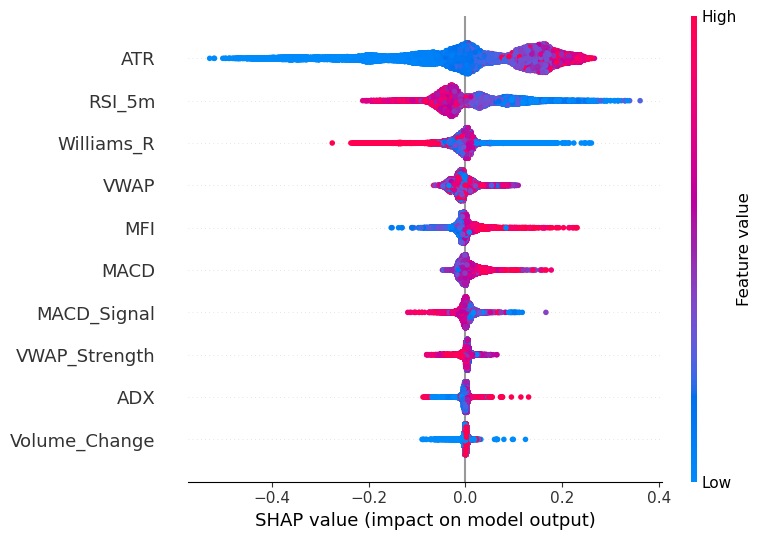

In [153]:
import shap
# Initialize SHAP explainer
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Plot feature importance
shap.summary_plot(shap_values, X_test)

In [119]:
# Count occurrences of each class (0: Down, 1: Up)
class_counts = np.bincount(y_train)
print(f"Class 0 (Down) Count: {class_counts[0]}")
print(f"Class 1 (Up) Count: {class_counts[1]}")

# Calculate imbalance ratio
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")  # If > 2.0, it's highly imbalanced

Class 0 (Down) Count: 83811
Class 1 (Up) Count: 60860
Imbalance Ratio: 1.38


In [121]:
selected_features = ["Volatility_15m", "RSI_5m", "VWAP", "Volume_5m_Sum", "RSI_15m", "MACD", "MACD_Signal"]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [122]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train XGBoost with optimized features
model_optimized = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.01, random_state=42)
model_optimized.fit(X_train_selected, y_train)

# Predict
y_pred_optimized = model_optimized.predict(X_test_selected)

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred_optimized))

Optimized Model Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.58      0.96      0.72     20778
           1       0.52      0.05      0.10     15390

    accuracy                           0.58     36168
   macro avg       0.55      0.51      0.41     36168
weighted avg       0.55      0.58      0.46     36168



/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or 

In [123]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# Get probability predictions
y_probs = model.predict_proba(X_test)[:, 1]

# Find the best threshold using precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Choose a threshold that increases recall while keeping precision reasonable
best_threshold = 0.35  # Lowering from 0.5 to catch more "Up" trades

# Apply the new threshold
y_pred_adjusted = (y_probs > best_threshold).astype(int)

# Evaluate the model with the new threshold
from sklearn.metrics import classification_report

print(f"Optimized Decision Threshold: {best_threshold}")
print(classification_report(y_test, y_pred_adjusted))

Optimized Decision Threshold: 0.35
              precision    recall  f1-score   support

           0       0.72      0.07      0.13     20778
           1       0.43      0.96      0.60     15390

    accuracy                           0.45     36168
   macro avg       0.58      0.52      0.36     36168
weighted avg       0.60      0.45      0.33     36168



/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or 

In [ ]:
import talib

# Compute new trend & order flow indicators
df_1m["ATR"] = talib.ATR(df_1m["high"], df_1m["low"], df_1m["close"], timeperiod=14)  # Average True Range
df_1m["MFI"] = talib.MFI(df_1m["high"], df_1m["low"], df_1m["close"], df_1m["volume"], timeperiod=14)  # Money Flow Index
df_1m["ADX"] = talib.ADX(df_1m["high"], df_1m["low"], df_1m["close"], timeperiod=14)  # Trend Strength
df_1m["CMO"] = talib.CMO(df_1m["close"], timeperiod=14)  # Chande Momentum Oscillator
df_1m["Williams_R"] = talib.WILLR(df_1m["high"], df_1m["low"], df_1m["close"], timeperiod=14)  # Overbought/Oversold

# Compute VWAP-based strength signal
df_1m["VWAP_Strength"] = (df_1m["close"] - df_1m["VWAP"]) / df_1m["VWAP"]

# Compute volume delta (difference between buys and sells)
df_1m["Volume_Change"] = df_1m["volume"].diff()

# Select only important features
selected_features = ["RSI_5m", "MACD", "MACD_Signal", "VWAP", "ATR", "MFI", "ADX", "Williams_R", "VWAP_Strength", "Volume_Change"]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Retrain the model
model.fit(X_train_selected, y_train)

KeyError: "['ATR', 'MFI', 'ADX', 'Williams_R', 'VWAP_Strength', 'Volume_Change'] not in index"